The datasets involved in this analysis are GroceryData and WeatherData.

1. GroceryData: This dataset contains detailed records of grocery sales, capturing various attributes such as department, item, description, quantity sold, price, and total sales over the period from August 2022 to March 2024. This data is crucial for analyzing consumer buying patterns in relation to external factors like weather.


2. WeatherData: This dataset provides daily weather observations over the same period, including metrics such as temperature, precipitation, and wind speed. Understanding weather patterns can be pivotal in analyzing and predicting trends in grocery sales.


3. Objectives of the Data Analysis
The primary objective of this analysis is to explore how weather conditions influence grocery sales. We aim to:
*   Identify patterns linking weather variations with sales trends.
*   Prepare the data for predictive modeling, which could be used to forecast sales under different weather conditions.
*   Enhance decision-making for inventory management based on predicted weather-related changes in consumer behavior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [ ]:
import pandas as pd

# loading data
GroceryData = pd.read_excel('/content/drive/MyDrive/AML Project DS/Updated/merged_data_August_2022_March_2024_new.xlsx')
WeatherData = pd.read_excel('/content/drive/MyDrive/AML Project DS/WeatherData.xlsx')
# Check for null values
null_values = GroceryData.isnull().sum()
null_values1 = WeatherData.isnull().sum()

# Print the count of null values in each column
print(null_values)
print(null_values1)

Department     14091
Item            1490
Description     1494
Qty Sold        1480
Sold Price      1481
Total Sales     1481
Dates              0
dtype: int64
Dates      0
tavg       0
tmin       0
tmax       0
prcp       0
snow       0
wdir       2
wspd       0
wpgt     596
pres       2
tsun     596
dtype: int64


**Grocery Data Summary**


Structure Overview:
1. Department: Category of the grocery item (e.g., BEER, BATH/CLEANING).
2. Item: Unique identifier for each item, presumably a UPC code or similar.
3. Description: Text description of the item (e.g., brand and type).
4. Qty Sold: Quantity of the item sold in the transaction.
5. Sold Price: Price at which each unit of the item was sold.
6. Total Sales: Total revenue from the sold items (calculated as Qty Sold x Sold Price).
7. Dates: Date of the transaction.


**Weather Data Summary**

Structure Overview:
1. Dates: Date of weather recording.
2. tavg: Average temperature for the day (in Celsius).
3. tmin: Minimum temperature for the day.
4. tmax: Maximum temperature for the day.
5. prcp: Precipitation in mm.
6. snow: Snowfall amount in mm.
7. wdir: Wind direction in degrees from true north.
8. wspd: Wind speed in km/h.
9. wpgt: Peak wind gust in km/h (mostly missing).
10. pres: Atmospheric pressure in hPa.
11. tsun: Sunshine duration in minutes (mostly missing).

**Grocery Data Information and Description:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Grocery Data:")
print(GroceryData.info())
print(GroceryData.describe())

print("\nWeather Data:")
print(WeatherData.info())
print(WeatherData.describe())

Grocery Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247289 entries, 0 to 247288
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Department   233198 non-null  object        
 1   Item         245799 non-null  object        
 2   Description  245795 non-null  object        
 3   Qty Sold     245809 non-null  float64       
 4   Sold Price   245808 non-null  object        
 5   Total Sales  245808 non-null  object        
 6   Dates        247289 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 13.2+ MB
None
            Qty Sold                          Dates
count  245809.000000                         247289
mean        1.571115  2023-06-21 22:56:06.157006848
min        -1.000000            2022-08-01 00:00:00
25%         1.000000            2023-02-19 00:00:00
50%         1.000000            2023-07-02 00:00:00
75%         1.000000            2023-

### Handling GroceryData Null values

Magnitude of Missing Data: A significant number of entries are missing from several key columns:

Department: 14,091 missing entries

Item: 1,490 missing entries

Description: 1,494 missing entries

Qty Sold, Sold Price, Total Sales: Approximately 1,480 missing entries each

In [ ]:
null_values = GroceryData.isnull().sum()
print(null_values)

Department     14091
Item            1490
Description     1494
Qty Sold        1480
Sold Price      1481
Total Sales     1481
Dates              0
dtype: int64


In [ ]:
null_department = GroceryData[GroceryData['Department'].isnull()]
null_item = GroceryData[GroceryData['Item'].isnull()]
null_description = GroceryData[GroceryData['Description'].isnull()]

# Display the rows where null values are present in the specified columns
print("Rows with null values in 'Department' column:")
print(null_department)

print("\nRows with null values in 'Item Description' column:")
print(null_item)

print("\nRows with null values in 'Description' column:")
print(null_description)

Rows with null values in 'Department' column:
       Department           Item                 Description  Qty Sold  \
579           NaN  8720181114472                  Axe Apollo       1.0   
583           NaN   716165295716                   Raw Cones       1.0   
584           NaN   716165295716                   Raw Cones       1.0   
585           NaN   716165295716                   Raw Cones       1.0   
586           NaN   716165295716                   Raw Cones       1.0   
...           ...            ...                         ...       ...   
246809        NaN   899450002029          Phulka Fresh 18 PK       1.0   
246891        NaN    21000080311    Taco Bell Chipotle Sauce       1.0   
246982        NaN   889392021431  Celsius Mango Passionfruit       1.0   
247241        NaN   808550300010              BK Seekh Kabab       1.0   
247279        NaN   899450002029          Phulka Fresh 18 PK       1.0   

       Sold Price Total Sales      Dates  
579          3.99     

In [ ]:
null_rows = GroceryData[GroceryData['Department'].isnull() & GroceryData['Item'].isnull() & GroceryData['Description'].isnull()]
print(null_rows)

       Department Item Description  Qty Sold Sold Price Total Sales      Dates
52355         NaN  NaN         NaN       NaN        NaN         NaN 2023-02-01
52390         NaN  NaN         NaN       NaN        NaN         NaN 2023-02-01
52391         NaN  NaN         NaN       NaN        NaN         NaN 2023-02-01
52420         NaN  NaN         NaN       NaN        NaN         NaN 2023-02-01
52456         NaN  NaN         NaN       NaN        NaN         NaN 2023-02-01
...           ...  ...         ...       ...        ...         ...        ...
135220        NaN  NaN         NaN       NaN        NaN         NaN 2023-07-31
135256        NaN  NaN         NaN       NaN        NaN         NaN 2023-07-31
135257        NaN  NaN         NaN       NaN        NaN         NaN 2023-07-31
135289        NaN  NaN         NaN       NaN        NaN         NaN 2023-07-31
135290        NaN  NaN         NaN       NaN        NaN         NaN 2023-07-31

[1481 rows x 7 columns]


In [ ]:
GroceryData = GroceryData.dropna(subset=['Department', 'Item', 'Description'], how='all')
print(GroceryData)

           Department           Item                     Description  \
0       BATH/CLEANING    62338057620  Air Wick Lavender &\nChamomile   
1                BEER   635985800804  White Claw Surge Variety\n12PK   
2                BEER   635985800804  White Claw Surge Variety\n12PK   
3       BATH/CLEANING   722429640314                    DRAIN OPENER   
4             GROCERY  8904063232250   Haldirams Yellow Lentil Curry   
...               ...            ...                             ...   
247284        GROCERY    26200117003         Giant Slim Jim Original   
247285        GROCERY           2000                         GROCERY   
247286        GROCERY           2000                         GROCERY   
247287        GROCERY           2000                         GROCERY   
247288        GROCERY           2000                         GROCERY   

        Qty Sold Sold Price Total Sales      Dates  
0            1.0       2.78        2.78 2022-08-01  
1            1.0      17.99  

In [ ]:
null_values = GroceryData.isnull().sum()
print(null_values)

Department     12610
Item               9
Description       13
Qty Sold           0
Sold Price         0
Total Sales        0
Dates              0
dtype: int64


In [ ]:
null_rows = GroceryData[GroceryData.isnull().any(axis=1)]
print(null_rows)

       Department           Item                 Description  Qty Sold  \
579           NaN  8720181114472                  Axe Apollo       1.0   
583           NaN   716165295716                   Raw Cones       1.0   
584           NaN   716165295716                   Raw Cones       1.0   
585           NaN   716165295716                   Raw Cones       1.0   
586           NaN   716165295716                   Raw Cones       1.0   
...           ...            ...                         ...       ...   
246809        NaN   899450002029          Phulka Fresh 18 PK       1.0   
246891        NaN    21000080311    Taco Bell Chipotle Sauce       1.0   
246982        NaN   889392021431  Celsius Mango Passionfruit       1.0   
247241        NaN   808550300010              BK Seekh Kabab       1.0   
247279        NaN   899450002029          Phulka Fresh 18 PK       1.0   

       Sold Price Total Sales      Dates  
579          3.99        3.99 2022-08-03  
583          2.77        

**Handling Missing Data:**

Missing values in the Description column were replaced with empty strings, and rows with missing values in both the Description and Department columns were dropped. The Description column was transformed into numerical vectors using CountVectorizer, while the Department column was encoded with LabelEncoder. A Multinomial Naive Bayes classifier was trained on the transformed data. Missing department values were predicted using the trained model, and imputed values were saved to an Excel file for further analysis.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Fill NaN values in the 'Description' column with an empty string
GroceryData['Description'] = GroceryData['Description'].fillna('')

df_train = GroceryData.dropna(subset=['Description', 'Department'])

# Convert the 'Description' column into vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(df_train['Description'])

# Encode the 'Department' column into integers
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(df_train['Department'])

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train_enc)

# Find the products with null 'Department' and predict their departments
null_products = GroceryData[GroceryData['Department'].isnull()]['Description']
null_products_vec = vectorizer.transform(null_products)
predicted_departments_enc = model.predict(null_products_vec)
predicted_departments = encoder.inverse_transform(predicted_departments_enc)

# Fill the null values in the original data
GroceryData.loc[GroceryData['Department'].isnull(), 'Department'] = predicted_departments

In [ ]:
null_rows = GroceryData[GroceryData.isnull().any(axis=1)]
print(null_rows)

       Department Item          Description  Qty Sold Sold Price Total Sales  \
6110      GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
17680     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
31284     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
41689     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
41690     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
79290     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
79291     GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
145389    GROCERY  NaN  NESCAFE CLASICO 7OZ       1.0       8.99        8.99   
145429       TOOL  NaN     ProMarX Pens 4PK       1.0       2.77        2.77   

            Dates  
6110   2022-08-26  
17680  2022-09-25  
31284  2022-10-26  
41689  2022-11-25  
41690  2022-11-25  
79290  2023-03-27  
79291  2023-03-27  
145389 2023-08-24  
145429 2023-08-25  

In [ ]:
# Fill the Item ID for the description "NESCAFE CLASICO 7OZ"
GroceryData.loc[GroceryData['Description'] == 'NESCAFE CLASICO 7OZ', 'Item'] = 28000466313
print(GroceryData)


           Department           Item                     Description  \
0       BATH/CLEANING    62338057620  Air Wick Lavender &\nChamomile   
1                BEER   635985800804  White Claw Surge Variety\n12PK   
2                BEER   635985800804  White Claw Surge Variety\n12PK   
3       BATH/CLEANING   722429640314                    DRAIN OPENER   
4             GROCERY  8904063232250   Haldirams Yellow Lentil Curry   
...               ...            ...                             ...   
247284        GROCERY    26200117003         Giant Slim Jim Original   
247285        GROCERY           2000                         GROCERY   
247286        GROCERY           2000                         GROCERY   
247287        GROCERY           2000                         GROCERY   
247288        GROCERY           2000                         GROCERY   

        Qty Sold Sold Price Total Sales      Dates  
0            1.0       2.78        2.78 2022-08-01  
1            1.0      17.99  

In [ ]:
GroceryData.drop(index=145429, inplace=True)
print(GroceryData)

           Department           Item                     Description  \
0       BATH/CLEANING    62338057620  Air Wick Lavender &\nChamomile   
1                BEER   635985800804  White Claw Surge Variety\n12PK   
2                BEER   635985800804  White Claw Surge Variety\n12PK   
3       BATH/CLEANING   722429640314                    DRAIN OPENER   
4             GROCERY  8904063232250   Haldirams Yellow Lentil Curry   
...               ...            ...                             ...   
247284        GROCERY    26200117003         Giant Slim Jim Original   
247285        GROCERY           2000                         GROCERY   
247286        GROCERY           2000                         GROCERY   
247287        GROCERY           2000                         GROCERY   
247288        GROCERY           2000                         GROCERY   

        Qty Sold Sold Price Total Sales      Dates  
0            1.0       2.78        2.78 2022-08-01  
1            1.0      17.99  

In [ ]:
null_values = GroceryData.isnull().sum()
print(null_values)

Department     0
Item           0
Description    0
Qty Sold       0
Sold Price     0
Total Sales    0
Dates          0
dtype: int64


In [ ]:
def clean_monetary_values(value):
  value = str(value)
  # Remove $ and parentheses
  value = value.replace('$', '').replace('(', '').replace(')', '')
  # Convert to float and return the absolute value
  try:
    return abs(float(value))
  except ValueError:
    return None  # Return None for any values that cannot be converted

# Apply the cleaning function to the 'Total Sales' and 'Sold Price' columns
GroceryData['Total Sales'] = GroceryData['Total Sales'].apply(clean_monetary_values)
GroceryData['Sold Price'] = GroceryData['Sold Price'].apply(clean_monetary_values)

GroceryData.dropna(subset=['Total Sales', 'Sold Price'], inplace=True)

# Display the first few rows of the cleaned dataset to verify changes
print(GroceryData.head())

      Department           Item                     Description  Qty Sold  \
0  BATH/CLEANING    62338057620  Air Wick Lavender &\nChamomile       1.0   
1           BEER   635985800804  White Claw Surge Variety\n12PK       1.0   
2           BEER   635985800804  White Claw Surge Variety\n12PK       1.0   
3  BATH/CLEANING   722429640314                    DRAIN OPENER       1.0   
4        GROCERY  8904063232250   Haldirams Yellow Lentil Curry       1.0   

   Sold Price  Total Sales      Dates  
0        2.78         2.78 2022-08-01  
1       17.99        17.99 2022-08-01  
2       17.99        17.99 2022-08-01  
3        4.63         4.63 2022-08-01  
4        2.99         2.99 2022-08-01  


In [ ]:
print(GroceryData.dtypes)

# Convert 'Dates' column to datetime type if it's not already
GroceryData['Dates'] = pd.to_datetime(GroceryData['Dates'])

# Check for missing values and handle them if necessary
print(GroceryData.isnull().sum())

Department             object
Item                   object
Description            object
Qty Sold              float64
Sold Price            float64
Total Sales           float64
Dates          datetime64[ns]
dtype: object
Department     0
Item           0
Description    0
Qty Sold       0
Sold Price     0
Total Sales    0
Dates          0
dtype: int64


In [ ]:
# GroceryData.to_excel('New_filled_data.xlsx', index=False)

**One Hot Encoding**

One-hot encoding was performed on categorical columns (Department, Item, Description) using pd.get_dummies(). This transformed categorical variables into binary vectors, creating new columns for each category. This technique enables the inclusion of categorical data in machine learning models that require numerical inputs. No normalization was applied in this context.

In [ ]:
# Define the categorical columns you want to encode
categorical_columns = ['Department', 'Description']

# Perform one-hot encoding
grocery_data_encoded = pd.get_dummies(GroceryData, columns=categorical_columns)
print(grocery_data_encoded.head())

            Item  Qty Sold  Sold Price  Total Sales      Dates  \
0    62338057620       1.0        2.78         2.78 2022-08-01   
1   635985800804       1.0       17.99        17.99 2022-08-01   
2   635985800804       1.0       17.99        17.99 2022-08-01   
3   722429640314       1.0        4.63         4.63 2022-08-01   
4  8904063232250       1.0        2.99         2.99 2022-08-01   

   Department_BATH/CLEANING  Department_BEER  Department_CANDY  \
0                      True            False             False   
1                     False             True             False   
2                     False             True             False   
3                      True            False             False   
4                     False            False             False   

   Department_CAT/DOG FOOD  Department_CIGAR  ...  \
0                    False             False  ...   
1                    False             False  ...   
2                    False             False  .

### Handling Weather Data Null values

In [ ]:
print(WeatherData.shape)
print(WeatherData)
null_values = WeatherData.isnull().sum()
print(null_values)

(596, 11)
          Dates  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
0    2022-08-01  24.1  16.1  31.7   0.0     0  196.0  12.2   NaN  1011.8   NaN
1    2022-08-02  25.4  19.4  27.8   0.0     0  261.0  17.6   NaN  1009.7   NaN
2    2022-08-03  24.0  16.7  32.2   0.0     0  196.0   9.4   NaN  1013.9   NaN
3    2022-08-04  27.0  22.2  31.7   0.3     0  284.0   9.4   NaN  1015.0   NaN
4    2022-08-05  25.7  22.2  31.7   7.4     0  280.0   6.1   NaN  1019.3   NaN
..          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
591  2024-03-14  10.8   3.3  17.8   4.8     0  339.0   7.9   NaN  1015.1   NaN
592  2024-03-15   9.6   5.0  10.6   1.3     0  285.0  13.7   NaN  1008.9   NaN
593  2024-03-16   7.2   3.9  13.3   0.0     0  250.0  15.1   NaN  1007.7   NaN
594  2024-03-17   7.7   2.2  12.2   1.3     0  266.0  19.8   NaN  1001.7   NaN
595  2024-03-18   2.2   0.0   3.3   1.0     0  255.0  22.7   NaN  1006.7   NaN

[596 rows x 11 columns]
Dates      0
tavg

In [ ]:
WeatherData.drop(columns=['tsun','pres', 'wpgt'], inplace=True)

In [ ]:
# Column names of your WeatherData DataFrame
weather_column_names = ['Dates', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd']

# Exclude the 'Dates' column as it's not numerical
numerical_column_names = weather_column_names[1:]
print(numerical_column_names)

['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd']


In [ ]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
WeatherData[numerical_column_names] = median_imputer.fit_transform(WeatherData[numerical_column_names])


In [ ]:
null_values = WeatherData.isnull().sum()
print(null_values)

Dates    0
tavg     0
tmin     0
tmax     0
prcp     0
snow     0
wdir     0
wspd     0
dtype: int64


#### Visualization for weather and grocery data

**Weather Patterns and Their Impact on Inventory Management and Demand Forecasting**

In the realm of inventory management and demand forecasting, weather variables play a pivotal role. The upcoming histograms provide insights into several key weather parameters that can influence inventory levels and consumer demand.

- The `Distribution of Snow` histogram is crucial as heavy snowfall can disrupt transportation routes and delivery schedules, impacting inventory replenishment and demand patterns.
- The `Distribution of Wind Direction and Speed` histograms are included to consider the potential impact on shipping logistics and energy use in warehouses, which can affect operational costs and inventory turnover rates.
- The `Distribution of Maximum, Average, and Minimum Temperatures` histograms aid in forecasting demand for seasonal products and in planning for climate control within storage facilities to maintain product quality.

Collectively, these histograms will help us to discern patterns and anomalies in weather that could affect both the supply side (inventory levels, shipment timings) and the demand side (customer purchasing behavior, product needs) of operations. Identifying these patterns enables more accurate demand forecasting and efficient inventory management strategies, particularly for products sensitive to weather conditions.


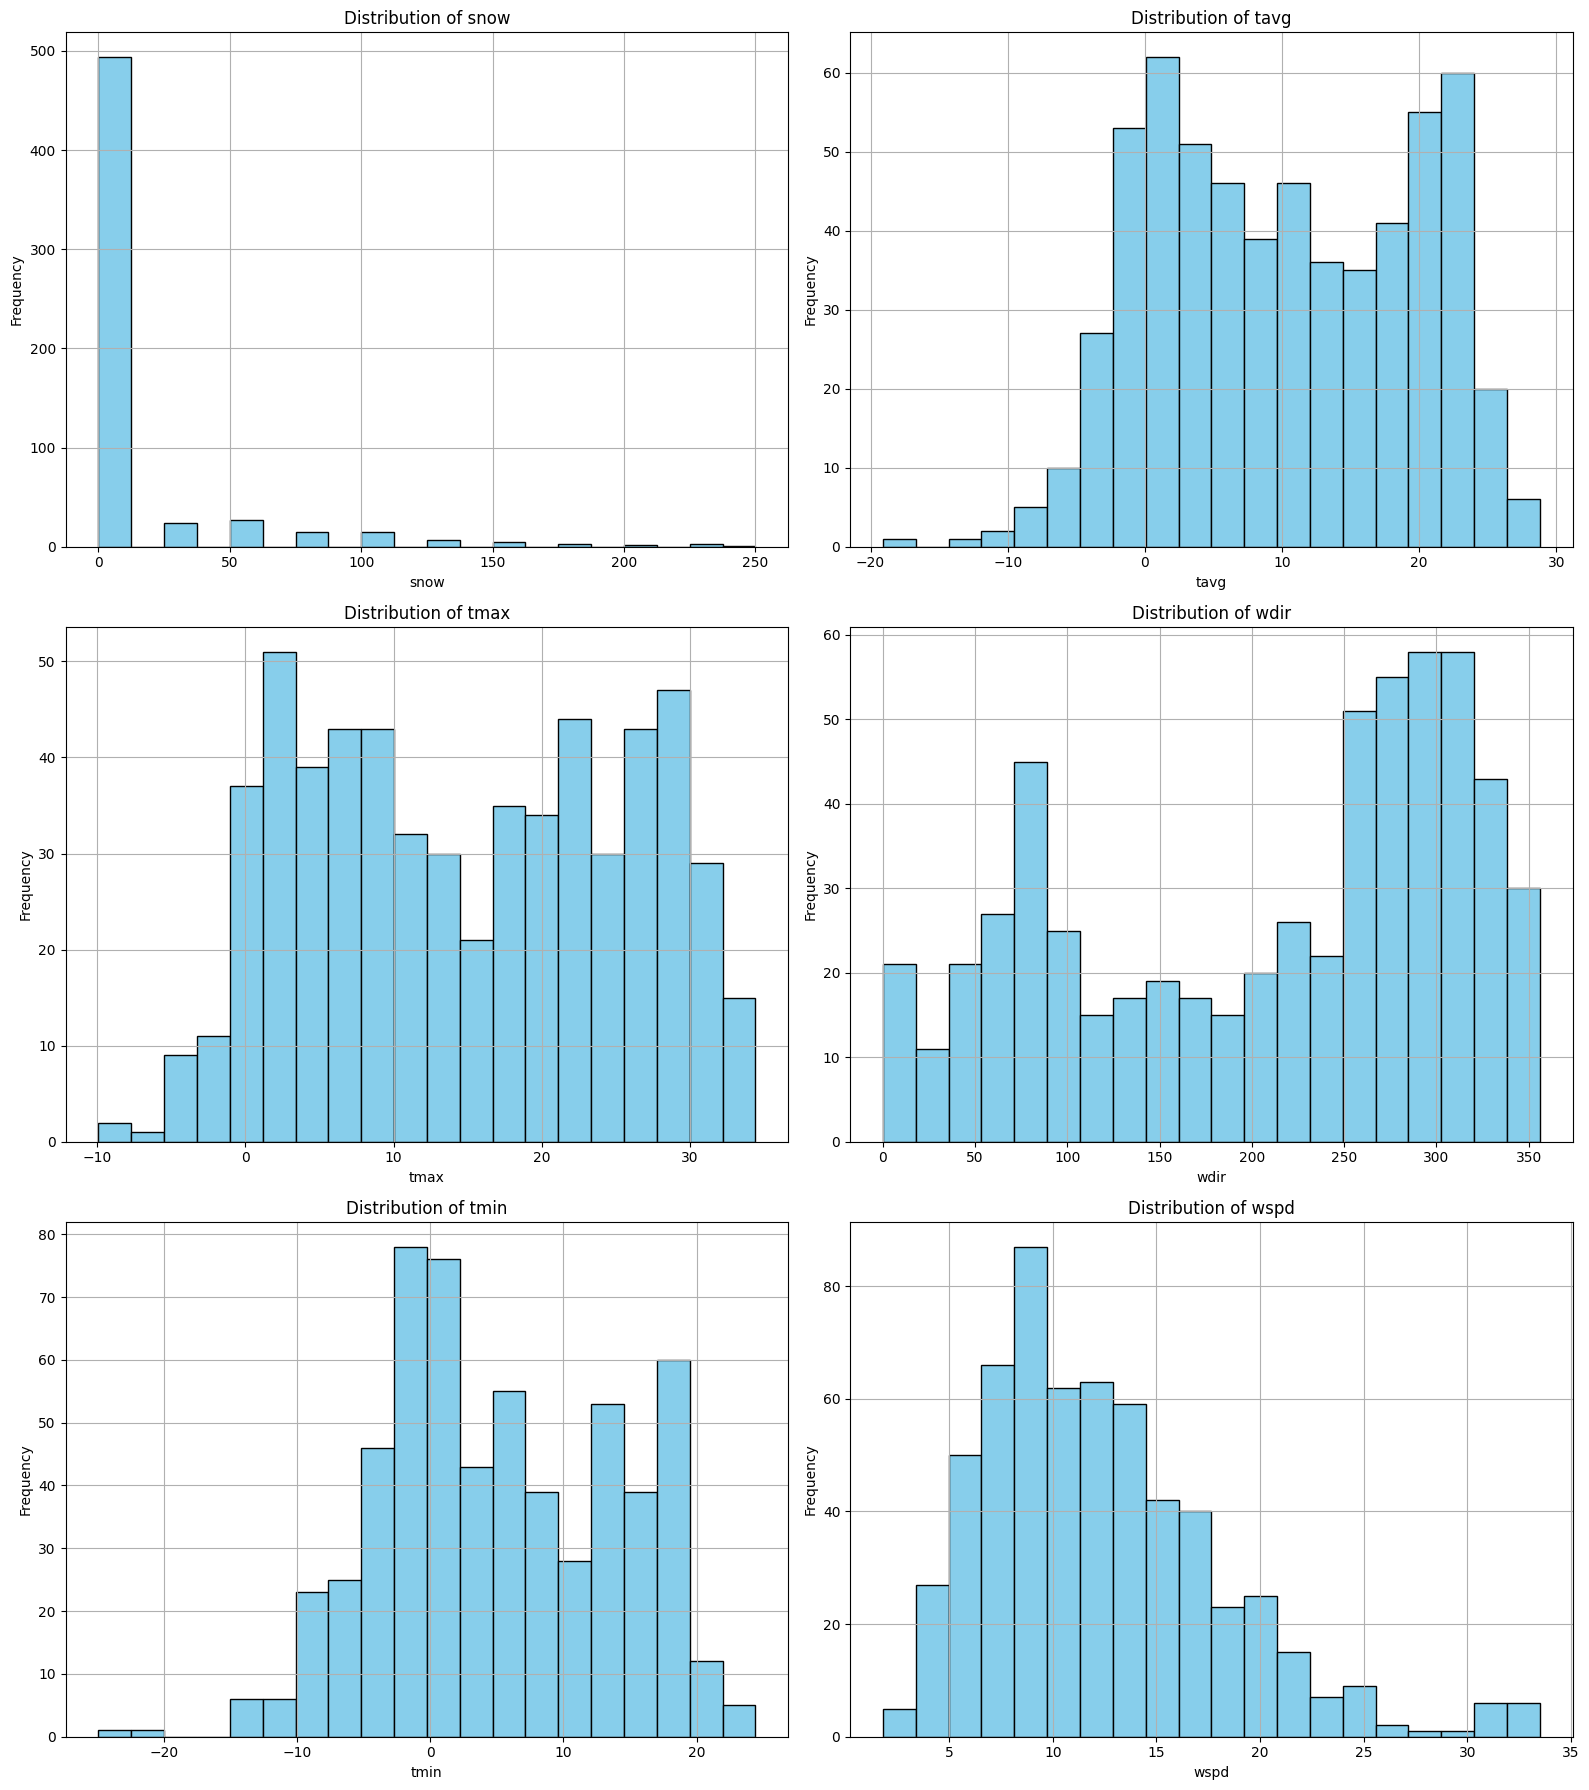

In [ ]:
import matplotlib.pyplot as plt

num_cols = set(numerical_column_names)
num_cols.remove('prcp')


# Number of numerical columns
num_columns = len(num_cols)

# Calculate the number of rows needed for 2 columns
num_rows = (num_columns + 1) // 2

# Create a figure and axes with 'num_rows' rows and 2 columns
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 6*num_rows))

# Flatten the axes array for easier indexing
axs = axs.ravel()

# Plot histograms for each numerical variable
for idx, column in enumerate(num_cols):
  axs[idx].hist(WeatherData[column], bins=20, color='skyblue', edgecolor='black')
  axs[idx].set_title(f'Distribution of {column}')
  axs[idx].set_xlabel(column)
  axs[idx].set_ylabel('Frequency')
  axs[idx].grid(True)

# If the number of variables is odd, hide the last subplot (if unused)
if num_columns % 2 != 0:
  axs[-1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Evaluating Temperature Variability for Demand Planning**

Temperature fluctuations significantly influence consumer purchasing behavior and consequently the demand for certain products. The boxplot below illustrates the variability in average daily temperatures (`tavg`). This visualization provides a clear summary of the central tendency and dispersion of temperatures, which can be instrumental in planning for seasonal inventory changes. For example, extreme temperatures might increase the demand for heating or cooling products, while mild temperatures could influence the sales of outdoor goods.

The median, depicted by the orange line, along with the interquartile range, offers insight into the typical temperature range within which most days fall. The whiskers extend to the minimum and maximum values that are not considered outliers, providing a sense of the full range of temperatures encountered. By understanding these temperature distributions, inventory managers can better anticipate and respond to changes in product demand tied to weather conditions.


             tavg        tmin        tmax        prcp        snow        wdir  \
count  596.000000  596.000000  596.000000  596.000000  596.000000  596.000000   
mean    10.066779    5.197315   14.958893    2.983054   13.942953  209.320470   
std      9.349183    8.841447   10.507587    6.685062   37.761615  103.317442   
min    -19.100000  -24.900000   -9.900000    0.000000    0.000000    0.000000   
25%      1.975000   -1.600000    5.600000    0.000000    0.000000  105.750000   
50%      9.700000    4.400000   14.700000    0.000000    0.000000  249.000000   
75%     19.100000   13.300000   24.400000    2.800000    0.000000  294.250000   
max     28.800000   24.400000   34.400000   62.200000  250.000000  356.000000   

             wspd  
count  596.000000  
mean    12.356208  
std      5.718104  
min      1.800000  
25%      8.300000  
50%     11.500000  
75%     15.500000  
max     33.500000  
Missing Values:
 Dates    0
tavg     0
tmin     0
tmax     0
prcp     0
snow     0
wdir   

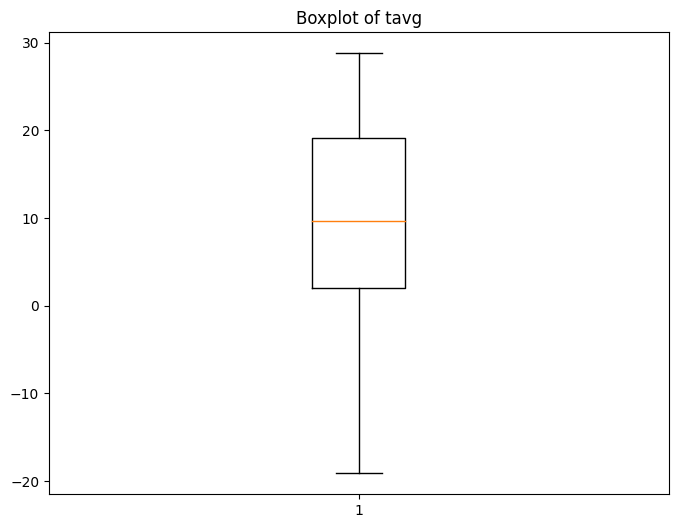

In [ ]:
print(WeatherData.describe())

# Identify variables with missing values
missing_values = WeatherData.isnull().sum()
print("Missing Values:\n", missing_values)

# Identify outliers (e.g., using boxplots or z-scores)
plt.figure(figsize=(8, 6))
plt.boxplot(WeatherData['tavg'])
plt.title('Boxplot of tavg')
plt.show()


**Interpreting Weather Variable Correlations for Inventory Strategy**

Understanding the relationships between different weather variables is vital for anticipating their collective impact on inventory and sales. The correlation heatmap below visualizes the strength and direction of relationships between average temperature (`tavg`), minimum temperature (`tmin`), maximum temperature (`tmax`), precipitation (`prcp`), snowfall (`snow`), wind direction (`wdir`), and wind speed (`wspd`).

Notably, there are strong positive correlations between `tavg`, `tmin`, and `tmax`, which suggests redundancy; therefore, one or two of these variables could potentially be excluded from detailed analysis without significant loss of information. Conversely, the negative correlations between temperatures and `snow` could inform seasonal inventory adjustments—higher snowfall may predict increased demand for winter products.

This heatmap helps in making strategic decisions about which weather variables should be closely monitored and forecasted for effective inventory management. For instance, a strong negative correlation between `snow` and `wspd` might influence logistical planning during winter months. Ultimately, these insights assist in refining demand forecasting models to be more sensitive to weather variables that show significant correlations.


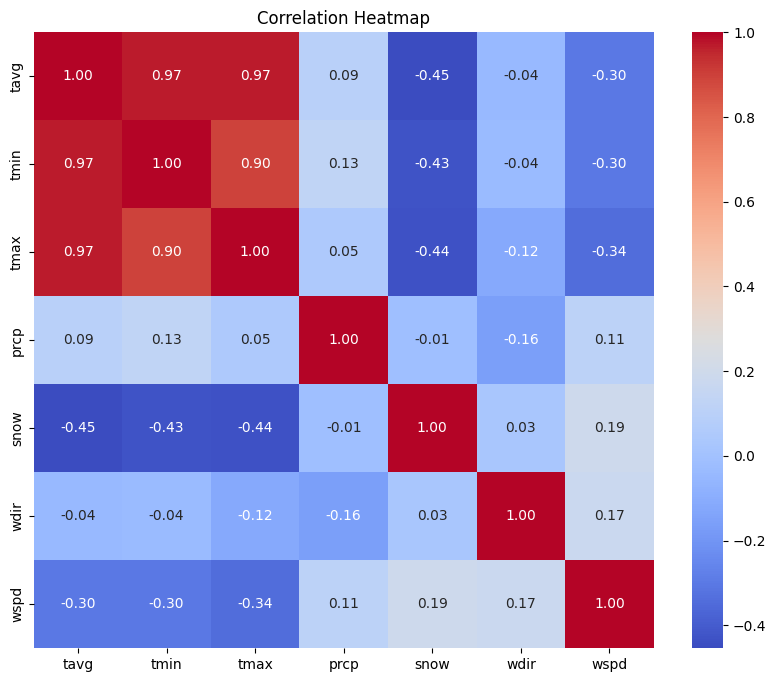

In [ ]:
# Exclude non-numeric columns
numeric_columns = WeatherData.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = WeatherData[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<Figure size 10000x10000 with 0 Axes>

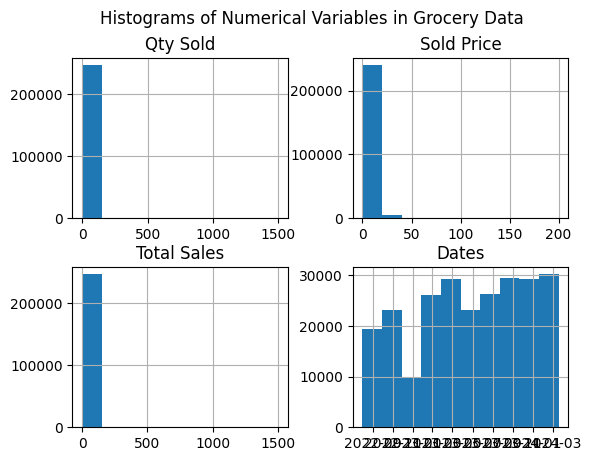

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables in grocery data
plt.figure(figsize=(100, 100))
GroceryData.hist()
plt.suptitle('Histograms of Numerical Variables in Grocery Data')
plt.show()


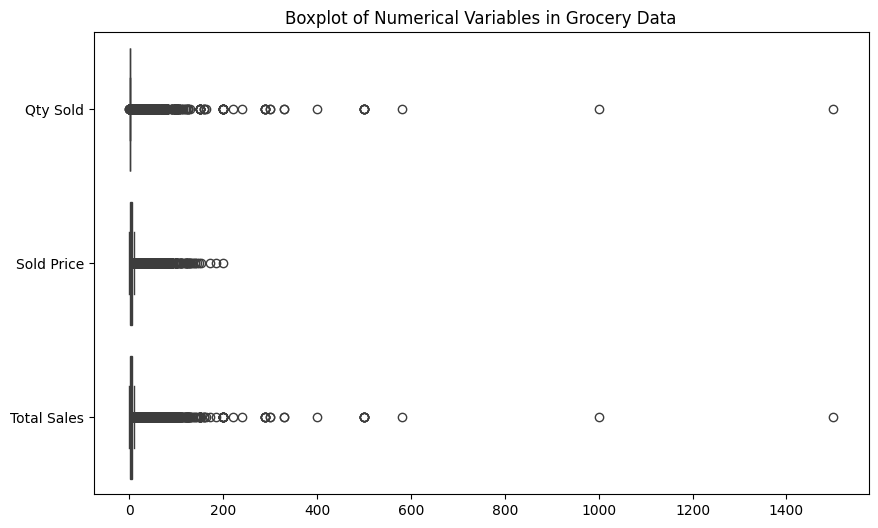

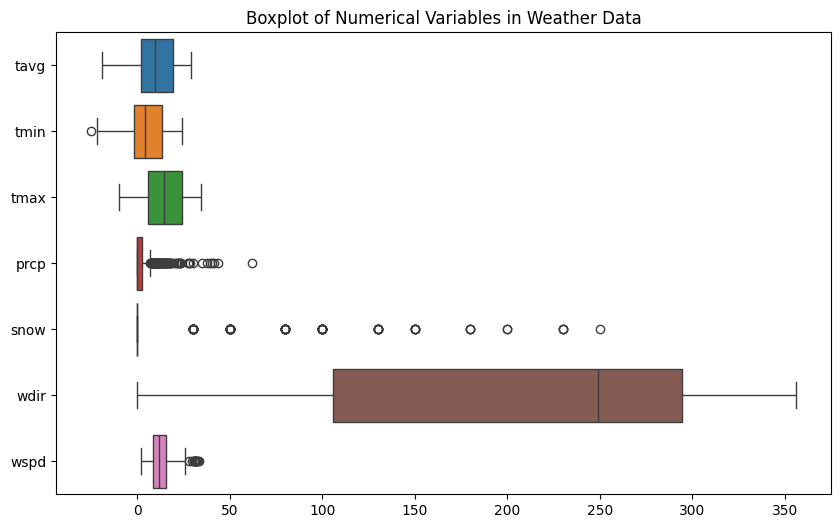

In [ ]:
# Identify outliers using box plots for numerical variables in grocery data
plt.figure(figsize=(10, 6))
sns.boxplot(data=GroceryData, orient='h')
plt.title('Boxplot of Numerical Variables in Grocery Data')
plt.show()

# Identify outliers using box plots for numerical variables in weather data
plt.figure(figsize=(10, 6))
sns.boxplot(data=WeatherData, orient='h')
plt.title('Boxplot of Numerical Variables in Weather Data')
plt.show()


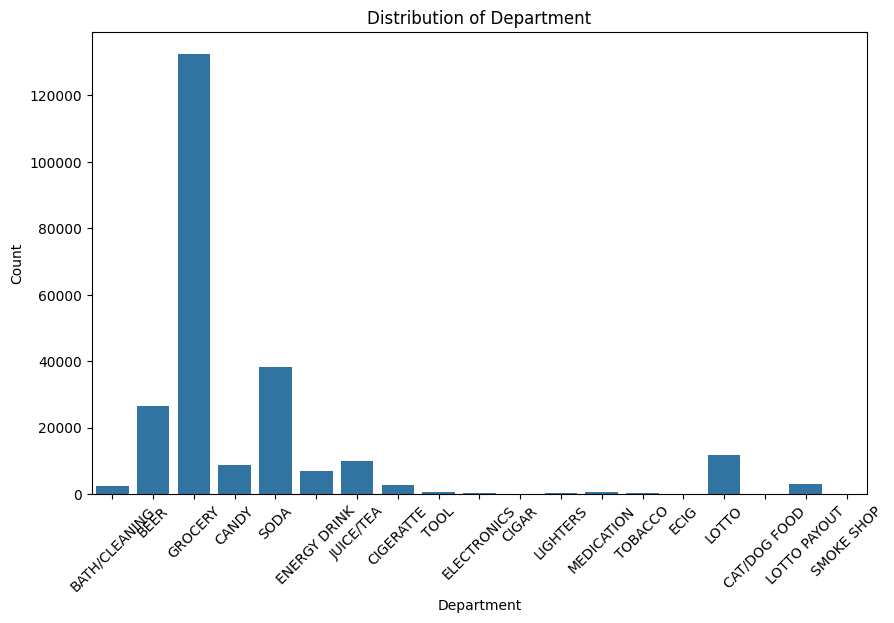

In [ ]:
# Plot bar charts for categorical features
categorical_features = ['Department']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=GroceryData, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
GroceryData.columns

Index(['Department', 'Item', 'Description', 'Qty Sold', 'Sold Price',
       'Total Sales', 'Dates'],
      dtype='object')

In [ ]:
# Delete rows where Description is 'LOTTO' or 'LOTTO PAYOUT'
GroceryData = GroceryData[~((GroceryData['Description'] == 'LOTTO') |
                                      (GroceryData['Description'] == 'LOTTO PAYOUT'))]


In [ ]:
# Convert the 'Dates' column in one of the datasets to datetime64[ns]
WeatherData['Dates'] = pd.to_datetime(WeatherData['Dates'])

# Now, you can perform the merge
merged_data = pd.merge(grocery_data_encoded, WeatherData, on='Dates', how='inner')

In [ ]:
print(merged_data)

                 Item  Qty Sold  Sold Price  Total Sales      Dates  \
0         62338057620       1.0        2.78         2.78 2022-08-01   
1        635985800804       1.0       17.99        17.99 2022-08-01   
2        635985800804       1.0       17.99        17.99 2022-08-01   
3        722429640314       1.0        4.63         4.63 2022-08-01   
4       8904063232250       1.0        2.99         2.99 2022-08-01   
...               ...       ...         ...          ...        ...   
245802    26200117003       1.0        1.50         1.50 2024-03-18   
245803           2000       1.0        0.25         0.25 2024-03-18   
245804           2000       1.0        2.00         2.00 2024-03-18   
245805           2000       1.0        2.50         2.50 2024-03-18   
245806           2000       1.0        3.50         3.50 2024-03-18   

        Department_BATH/CLEANING  Department_BEER  Department_CANDY  \
0                           True            False             False   
1    

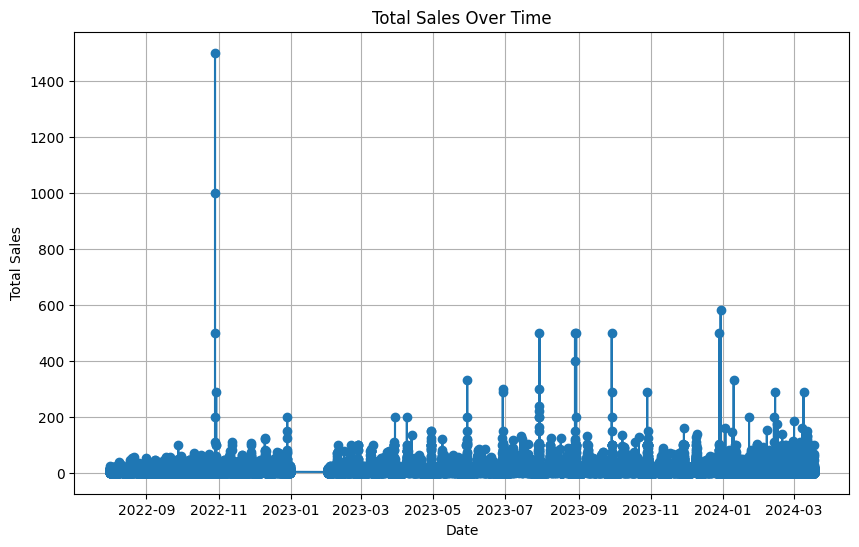

In [ ]:
import matplotlib.pyplot as plt

# Plot Total Sales over time
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Dates'], merged_data['Total Sales'], marker='o', linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [ ]:
# merged_data.to_excel('Merged_data.xlsx', index=False)

## Modeling

In [ ]:
# Calculate the total memory usage of the DataFrame in bytes
total_memory_bytes = merged_data.memory_usage(deep=True).sum()

# Convert bytes to megabytes
total_memory_mb = total_memory_bytes / (1024**2)

print(f'Total memory usage: {total_memory_mb} MB')

Total memory usage: 929.5087289810181 MB


In [ ]:
merged_data.columns

Index(['Item', 'Qty Sold', 'Sold Price', 'Total Sales', 'Dates',
       'Department_BATH/CLEANING', 'Department_BEER', 'Department_CANDY',
       'Department_CAT/DOG FOOD', 'Department_CIGAR',
       ...
       'Description_whole wheat bread', 'Description_xtra care Hand sanitizer',
       'Description_zzzQuil', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir',
       'wspd'],
      dtype='object', length=3850)

In [ ]:
# merged_data.head()

In [ ]:
# # Initialize an empty DataFrame to store description-wise daily sales
# description_sales = pd.DataFrame(index=merged_data['Dates'].unique())

# # Loop over each description column to calculate daily sales for each description
# for description in description_columns:
#     # Multiply 'Total Sales' by the description column to get sales for that description
#     description_daily_sales = merged_data[description] * merged_data['Total Sales']

#     # Group by 'Dates' and sum to get total daily sales for the description
#     description_sales[description] = description_daily_sales.groupby(merged_data['Dates']).sum()

# # Reset the index to get 'Dates' as a column
# description_sales.reset_index(inplace=True, drop=False)

# # Rename the 'index' column to 'Dates'
# description_sales.rename(columns={'index': 'Dates'}, inplace=True)

# # Now, description_sales has the daily total sales for each description
# print(description_sales.head())

In [ ]:
import pandas as pd

# Assume 'merged_data' is your DataFrame and it has already been loaded.
# It contains 'Item', 'Qty Sold', 'Sold Price', 'Total Sales', 'Dates',
# one-hot encoded 'Department_' and 'Description_' columns, and weather columns.

weather_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd']

# First, let's extract the original 'Department' and 'Description' from the one-hot encoded columns
def get_original_category(row, prefix):
    for col in row.index:
        if col.startswith(prefix) and row[col]:
            return col.replace(prefix, '')
    return None

# Apply the function to each row for Department and Description
merged_data['Department'] = merged_data.apply(lambda row: get_original_category(row, 'Department_'), axis=1)
merged_data['Description'] = merged_data.apply(lambda row: get_original_category(row, 'Description_'), axis=1)

# Now let's group by 'Dates', 'Department', and 'Description', summing the 'Qty Sold' for each.
grouped = merged_data.groupby(['Dates', 'Department', 'Description'])['Qty Sold'].sum().reset_index()

# For the weather data, we assume one weather entry per day.
weather_data = merged_data.groupby('Dates')[weather_columns].first().reset_index()

# Merge the grouped sales data with the weather data.
final_data = pd.merge(grouped, weather_data, on='Dates', how='left')

# Rename 'Qty Sold' to 'Quantity Sold' for clarity
final_data.rename(columns={'Qty Sold': 'Quantity Sold'}, inplace=True)

# Ensure the final dataframe has the desired columns
final_data = final_data[['Dates', 'Quantity Sold', 'Description', 'Department'] + weather_columns]

print(final_data.head())

<ipython-input-45-4bfb818fcfbf>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sales_data['Department'] = sales_data[department_columns].apply(lambda x: x[x.notnull()].iloc[0], axis=1).str.replace('Department_', '')


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Assuming item_sales is defined and sorted as per previous steps

# # Check if you need to difference the data by checking stationarity
# from statsmodels.tsa.stattools import adfuller

# # The ADF test result variable needs to be defined outside of the if-statement
# adf_result = adfuller(item_sales)
# print('ADF Statistic:', adf_result[0])
# print('p-value:', adf_result[1])

# # Initialize item_sales_diff to item_sales in case no differencing is needed
# item_sales_diff = item_sales

# # If p-value > 0.05, the series is non-stationary, and we need to difference it
# if adf_result[1] > 0.05:
#     item_sales_diff = item_sales.diff().dropna()

# # Fit the ARIMA model (Assuming we have already chosen the order (p, d, q) based on ACF/PACF analysis)
# # Since the p-value is 0, we don't need to difference the data, hence d=0 in the order
# model = ARIMA(item_sales_diff, order=(1,0,1))
# fitted_model = model.fit()


# # The end of the dataset
# end_of_dataset = item_sales.index[-1]

# # Forecast future sales for 5 periods ahead
# forecast = fitted_model.get_forecast(steps=5)
# forecast_index = pd.date_range(start=end_of_dataset, periods=6, closed='right')
# forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# # Plot the original and forecasted sales
# plt.figure(figsize=(12, 6))
# plt.plot(item_sales, label='Original Item Sales')
# plt.plot(forecast_series, label='Forecast', color='red')
# plt.legend()
# plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming item_sales is defined and sorted as per previous steps

# Fit the ARIMA model to the non-differenced data
# (Since the series is stationary, we use d=0)
model = ARIMA(item_sales, order=(1,0,1))
fitted_model = model.fit()

# The end of the dataset
end_of_dataset = item_sales.index[-1]

# Forecast future sales for 5 periods ahead
forecast = fitted_model.get_forecast(steps=5)
forecast_index = pd.date_range(start=end_of_dataset, periods=5, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot the original and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(item_sales, label='Original Item Sales')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend()
plt.show()


NameError: name 'item_sales' is not defined